WE READ THE CSV AND TRANSFORM IT INTO DATA FRAMES

In [82]:
import pandas as pd
checkin_checkout = pd.read_csv('checkin_checkout_history_updated.csv')
gym_locations_data = pd.read_csv('gym_locations_data.csv')
subscription_plans = pd.read_csv('subscription_plans.csv')
users_data = pd.read_csv('users_data.csv')

WE CREATE THE CONEXION TO A BBDD AND TRANSFORM THE DATAFRAMES INTO TABLES

In [83]:
#pip install sqlalchemy
from sqlalchemy import create_engine

# Create a conexion to a SQLite data base
engine = create_engine('sqlite:///mi_base_de_datos.db')


# Write the DataFrame to a SQL table
checkin_checkout.to_sql('checkin_checkout', con=engine, index=False, if_exists='replace')
gym_locations_data.to_sql('gym_locations_data', con=engine, index=False, if_exists='replace')
subscription_plans.to_sql('subscription_plans', con=engine, index=False, if_exists='replace')
users_data.to_sql('users_data', con=engine, index=False, if_exists='replace')

5000

WE CONNECT TO THE DATABASE AND CREATE A CURSOR TO EXECUTE THE SQL QUERIES

In [84]:
# Create a cursor to run SQL queries
import sqlite3
# Connect to the SQLite database
conn = sqlite3.connect('mi_base_de_datos.db')

# Create a cursor to run SQL queries
cursor = conn.cursor()

In [85]:
cursor.execute('''
DROP TABLE Tabla_1 
''')
# Commit changes to the database
conn.commit()

WE CREATE A TABLE WITH THE FIELDS WE WANT TO START CONSULTING

In [86]:
cursor.execute('''
CREATE TABLE Tabla_1 AS
SELECT checkin_checkout.gym_id, checkin_checkout.workout_type, checkin_checkout.calories_burned, users_data.age, users_data.gender, users_data.birthdate
FROM checkin_checkout
INNER JOIN users_data
ON checkin_checkout.user_id = users_data.user_id
''')
# Commit changes to the database
conn.commit()

In [87]:
cursor.execute('''
SELECT * from Tabla_1 group by gender
''')
result = cursor.fetchall()
print("\nMostramos la Tabla_1:")
for row in result:
    print(row)


Mostramos la Tabla_1:
('gym_6', 'Weightlifting', 462, 41, 'Female', '1998-03-10')
('gym_7', 'Cardio', 858, 37, 'Male', '1986-03-12')
('gym_10', 'Swimming', 706, 61, 'Non-binary', '1961-08-13')


WE CREATE A TABLE THAT ORDERS THE NUMBER OF PEOPLE SIGNED UP FOR THE GYM BY GENDER

In [88]:
cursor.execute('''
SELECT gender, COUNT(gym_id) as Contador from Tabla_1 group by gender order by Contador desc
''')
result = cursor.fetchall()
print("\nNúmero de abonados al gym por género:")
for row in result:
    print(row)


Número de abonados al gym por género:
('Male', 139917)
('Female', 130716)
('Non-binary', 29367)


WE CREATE A TABLE THAT ORDERS THE NUMBER OF PEOPLE PER GYM

In [89]:
cursor.execute('''
SELECT gym_id, COUNT(gender) as Contador from Tabla_1 group by gym_id order by Contador desc
''')
result = cursor.fetchall()
print("\nNúmero de personas por gimnasio:")
for row in result:
    print(row)


Número de personas por gimnasio:
('gym_3', 30286)
('gym_4', 30182)
('gym_5', 30104)
('gym_7', 29954)
('gym_1', 29952)
('gym_8', 29935)
('gym_10', 29925)
('gym_2', 29895)
('gym_6', 29893)
('gym_9', 29874)


TO GET MORE VARIABLES, WE JOIN THE EXISTING TABLE WITH THE TABLE "gym_locations_data" WITH WHICH WE WILL DRAW MORE CONCLUSIONS

In [ ]:
cursor.execute('''
CREATE TABLE Tabla_2 AS
SELECT Tabla_1.gym_id, Tabla_1.workout_type, Tabla_1.calories_burned, Tabla_1.age, Tabla_1.gender, Tabla_1.birthdate, 
gym_locations_data.location, gym_locations_data.gym_type, gym_locations_data.facilities
FROM Tabla_1
INNER JOIN gym_locations_data
ON Tabla_1.gym_id = gym_locations_data.gym_id
''')
# Commit changes to the database
conn.commit()

NOW WE WILL BE ABLE TO KNOW THE STATES WITH THE MOST PEOPLE WHO GO TO THE GYM

In [91]:
cursor.execute('''
SELECT gym_id, location, COUNT(gender) as Contador from Tabla_2 group by gym_id order by Contador desc
''')
result = cursor.fetchall()
print("\nEstados con más personas que van al gym:")
for row in result:
    print(row)


Estados con más personas que van al gym:
('gym_3', 'Chicago', 30286)
('gym_4', 'Houston', 30182)
('gym_5', 'Phoenix', 30104)
('gym_7', 'San Antonio', 29954)
('gym_1', 'New York', 29952)
('gym_8', 'San Diego', 29935)
('gym_10', 'San Jose', 29925)
('gym_2', 'Los Angeles', 29895)
('gym_6', 'Philadelphia', 29893)
('gym_9', 'Dallas', 29874)


FROM THE GEOGRAPHY WITH THE MOST USERS (CHICAGO), WE FIND OUT WHICH SPORTS ARE THE MOST PRACTICED

In [92]:
cursor.execute('''
SELECT workout_type, COUNT(gender) as Contador from Tabla_2
WHERE location = 'Chicago'
group by workout_type order by Contador desc
''')
result = cursor.fetchall()
print("\nDeportes más practicados en Chicago:")
for row in result:
    print(row)


Deportes más practicados en Chicago:
('Pilates', 5225)
('Yoga', 5106)
('Weightlifting', 5054)
('Swimming', 5012)
('CrossFit', 4999)
('Cardio', 4890)


WITHIN THE GEOGRAPHY "CHICAGO" AND THE SPORT "PILATES" WE GET THE DISTINCTION BY GENDER

In [93]:
cursor.execute('''
SELECT gender, COUNT(age) as Contador from Tabla_2
WHERE location = 'Chicago' and workout_type = 'Pilates'
group by gender order by Contador desc
''')
result = cursor.fetchall()
print("\nOrdenación por género de gente de Chicago que practica Pilates:")
for row in result:
    print(row)


Ordenación por género de gente de Chicago que practica Pilates:
('Male', 2437)
('Female', 2301)
('Non-binary', 487)


FROM THE GEOGRAPHY "CHICAGO" WE GET WHICH SPORTS ON AVERAGE BURN THE MOST CALORIES

In [94]:
cursor.execute('''
SELECT workout_type, AVG(calories_burned) as Contador from Tabla_2
WHERE location = 'Chicago'
group by workout_type order by Contador desc
''')
result = cursor.fetchall()
print("\nCalories burned people from Chicago:")
for row in result:
    print(row)


Calories burned people from Chicago:
('Yoga', 892.7873090481786)
('CrossFit', 892.3872774554911)
('Pilates', 888.3523444976076)
('Cardio', 888.1883435582822)
('Swimming', 882.9772545889864)
('Weightlifting', 880.0227542540562)


WE FIND OUT WHICH ARE THE MOST POPULAR TYPES OF TRAINING AMONG ALL THE GYMS

In [95]:
cursor.execute('''
SELECT workout_type, COUNT(gender) as Contador from Tabla_2 group by workout_type order by Contador desc
''')
result = cursor.fetchall()
print("\nMost popular sports between all the gyms:")
for row in result:
    print(row)


Most popular sports between all the gyms:
('Weightlifting', 50306)
('Swimming', 50133)
('Pilates', 50035)
('CrossFit', 49976)
('Yoga', 49921)
('Cardio', 49629)


WE TAKE THE SPORTS THAT BURN THE MOST CALORIES ON AVERAGE OUT OF ALL THE GYMS

In [96]:
cursor.execute('''
SELECT workout_type, AVG(calories_burned) as Contador from Tabla_2 group by workout_type order by Contador desc
''')
result = cursor.fetchall()
print("\nCalories on average out of all the gyms:")
for row in result:
    print(row)


Calories on average out of all the gyms:
('Swimming', 887.6621187640875)
('Weightlifting', 887.1352721345366)
('CrossFit', 886.2506002881383)
('Yoga', 885.4820215941187)
('Cardio', 885.4621088476496)
('Pilates', 884.525312281403)


WE PROCEED TO VISUALIZE THE RESULTS IN GRAPHS

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cursor.execute('''
CREATE TABLE Sports_calories AS
SELECT workout_type, AVG(calories_burned) as Contador from Tabla_2 group by workout_type order by Contador desc
''')
# Commit changes to the database
conn.commit()

In [98]:
# Read the SQL Table in a Panda DataFrame
query = "SELECT * FROM Sports_calories"
df = pd.read_sql(query, conn)

# Export the DataFrame to a CSV file
df.to_csv('tabla_grafico.csv', index=False)

datos = pd.read_csv("tabla_grafico.csv")

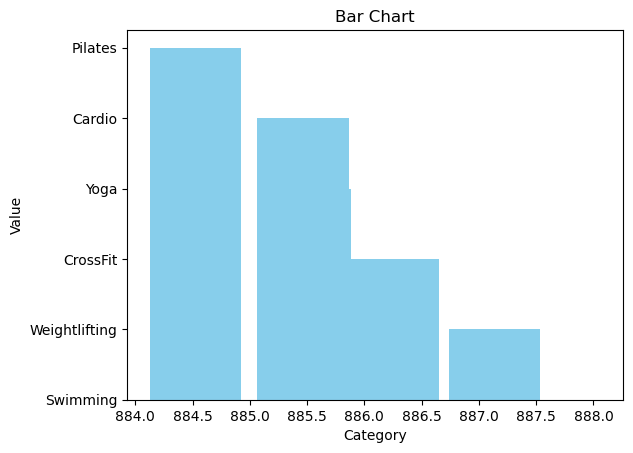

In [100]:
# Bar Chart Using Matplotlib
plt.bar(datos['Contador'], datos['workout_type'], color='skyblue')
plt.title("Bar Chart")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()

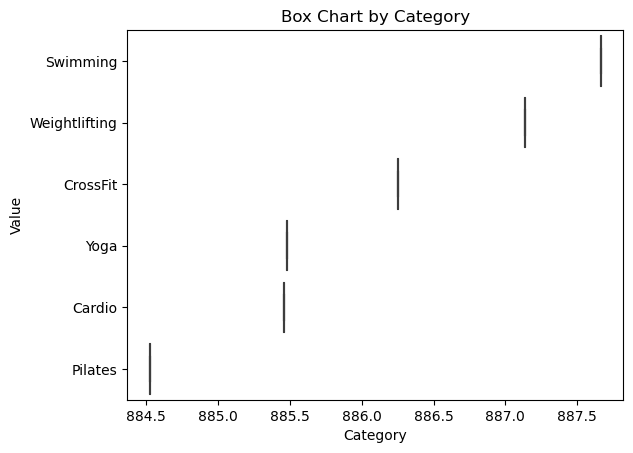

In [101]:
sns.boxplot(x='Contador', y='workout_type', data=datos)
plt.title("Box Chart by Category")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()